In [18]:
from skimage import io
from skimage import transform
import numpy as np
import random
import math

# Funcion which creates array of puzzle pieces
# From a given picture

def from_image_to_pieces(image_path, n_rows, n_cols):
  
  image = io.imread(image_path)

  size = image.shape
  size = min(size[0], size[1])
  
  image = image[0:size, 0:size]

  step = math.floor(size / n_rows)
  
  pieces = []
  index = 0

  for i in range(n_rows):
    for j in range(n_cols):
      pieces.append((np.array(image[i*step: (i+1)*step, j*step : (j+1)*step]), index))
      index += 1

  return pieces, step

pieces, step = from_image_to_pieces("lion.jpg", 10, 10)

In [20]:
def shuffle(pieces):
  random.shuffle(pieces)

  result = []

  for x in pieces:
    image = x[0]
    index = x[1]

    i = random.randint(0, 4)
    x = transform.rotate(image, i*90)
    result.append((x, index))

  return result

pieces = shuffle(pieces)


array([[[0.41176471, 0.32941176, 0.21568627],
        [0.48627451, 0.39215686, 0.28235294],
        [0.52941176, 0.42745098, 0.32156863],
        ...,
        [0.72941176, 0.5372549 , 0.27843137],
        [0.70980392, 0.51764706, 0.28627451],
        [0.69019608, 0.50588235, 0.29411765]],

       [[0.48627451, 0.4       , 0.30980392],
        [0.52941176, 0.43529412, 0.34117647],
        [0.56470588, 0.45490196, 0.36862745],
        ...,
        [0.7254902 , 0.52941176, 0.28235294],
        [0.69411765, 0.50196078, 0.27058824],
        [0.68235294, 0.49803922, 0.28627451]],

       [[0.55686275, 0.46666667, 0.39607843],
        [0.54901961, 0.45098039, 0.37254902],
        [0.59607843, 0.48627451, 0.40392157],
        ...,
        [0.72156863, 0.5254902 , 0.28627451],
        [0.68627451, 0.49411765, 0.2745098 ],
        [0.60784314, 0.42352941, 0.21960784]],

       ...,

       [[0.83921569, 0.85490196, 0.90196078],
        [0.83921569, 0.85490196, 0.90196078],
        [0.83921569, 0

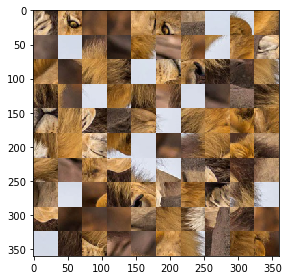

In [27]:
def make_image(pieces, step, n_rows, n_cols):

  image = np.array([])
  image = np.resize(image, (n_rows*step, n_cols*step, 3))

  for i in range(n_rows):
    for j in range(n_cols):
      image[i*step : (i+1)*step, j*step : (j+1)*step] = (pieces[i*n_cols + j])[0]
    
  #io.imshow(image)
  #io.imsave("slika.jpg", image)

  return image

make_image(pieces, 36, 10, 10)

In [17]:
def init_pop(population_size):
  pop = []

  image_path = input("Unesite putanju do slike: ")

  init_puzzle, step = from_image_to_pieces(image_path, 10, 10)

  for i in range(population_size):
    image = shuffle(init_puzzle)
    pop.append(image)
    #x = make_image(image, step, 10, 10)
    #io.imsave(f"Slika_{i}.jpg", x)

  return pop

population = init_pop(3)

  

Unesite putanju do slike: lion.jpg


In [31]:
def selection(population, selection_size, tournament_size, elite_size, elite = False):
  # TODO How we compare those values
  population = sorted(population)
  if elite == True:
    if elite_size > selection_size:
      selection = population[0:selection_size]
      return selection
    else:
      selection = population[0:elite_size]

  for i in range(selection_size - elite_size):
    tournament = random.choices(population, tournament_size)
    # TODO How we compare those values
    selection.append(max(tournament))

  return selection


In [ ]:
def GA():

  population = init_pop()
  global_best = None

  for i in range(self.max_iteration):
    selected = selection(population, selection_size, tournament_size, elite_size, elite)
    population = cross(selected)
    population = mutation(selected)

    best = max(population)
    print(best)
    if best > global_best:
      global_best = best

    if (is_end(best)):
      break

  return global_best